In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Series Temporales

La librería estándar de Python incluye tipos de datos para fechas y horas, además de funcionalidad relacionada con el calendario.

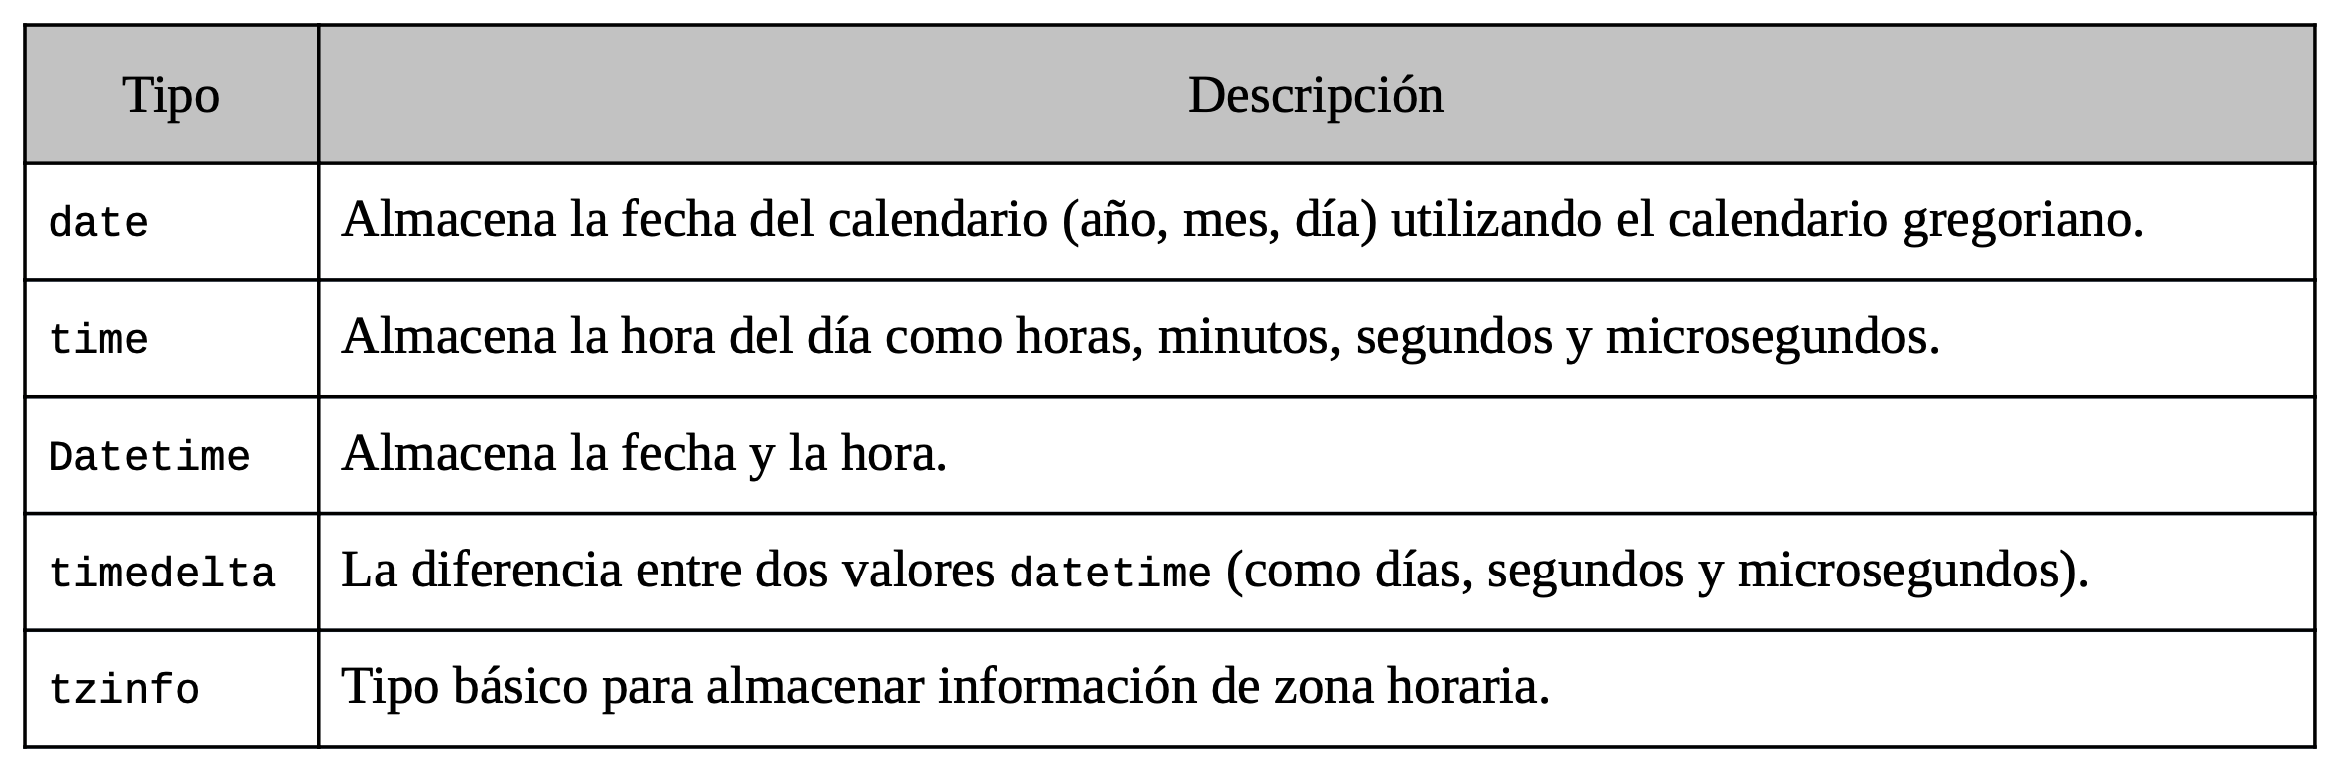

In [2]:
from datetime import datetime

Se pueden formatear objetos datetime y objetos Timestamp de pandas como cadenas de texto utilizando *str* o el método *strftime*, pasando una especificación de formato.

In [4]:
stamp = datetime(2011, 1, 3)

In [6]:
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [5]:
str(stamp)

'2011-01-03 00:00:00'

In [7]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

datetime ofrece una completa lista de códigos de formato.

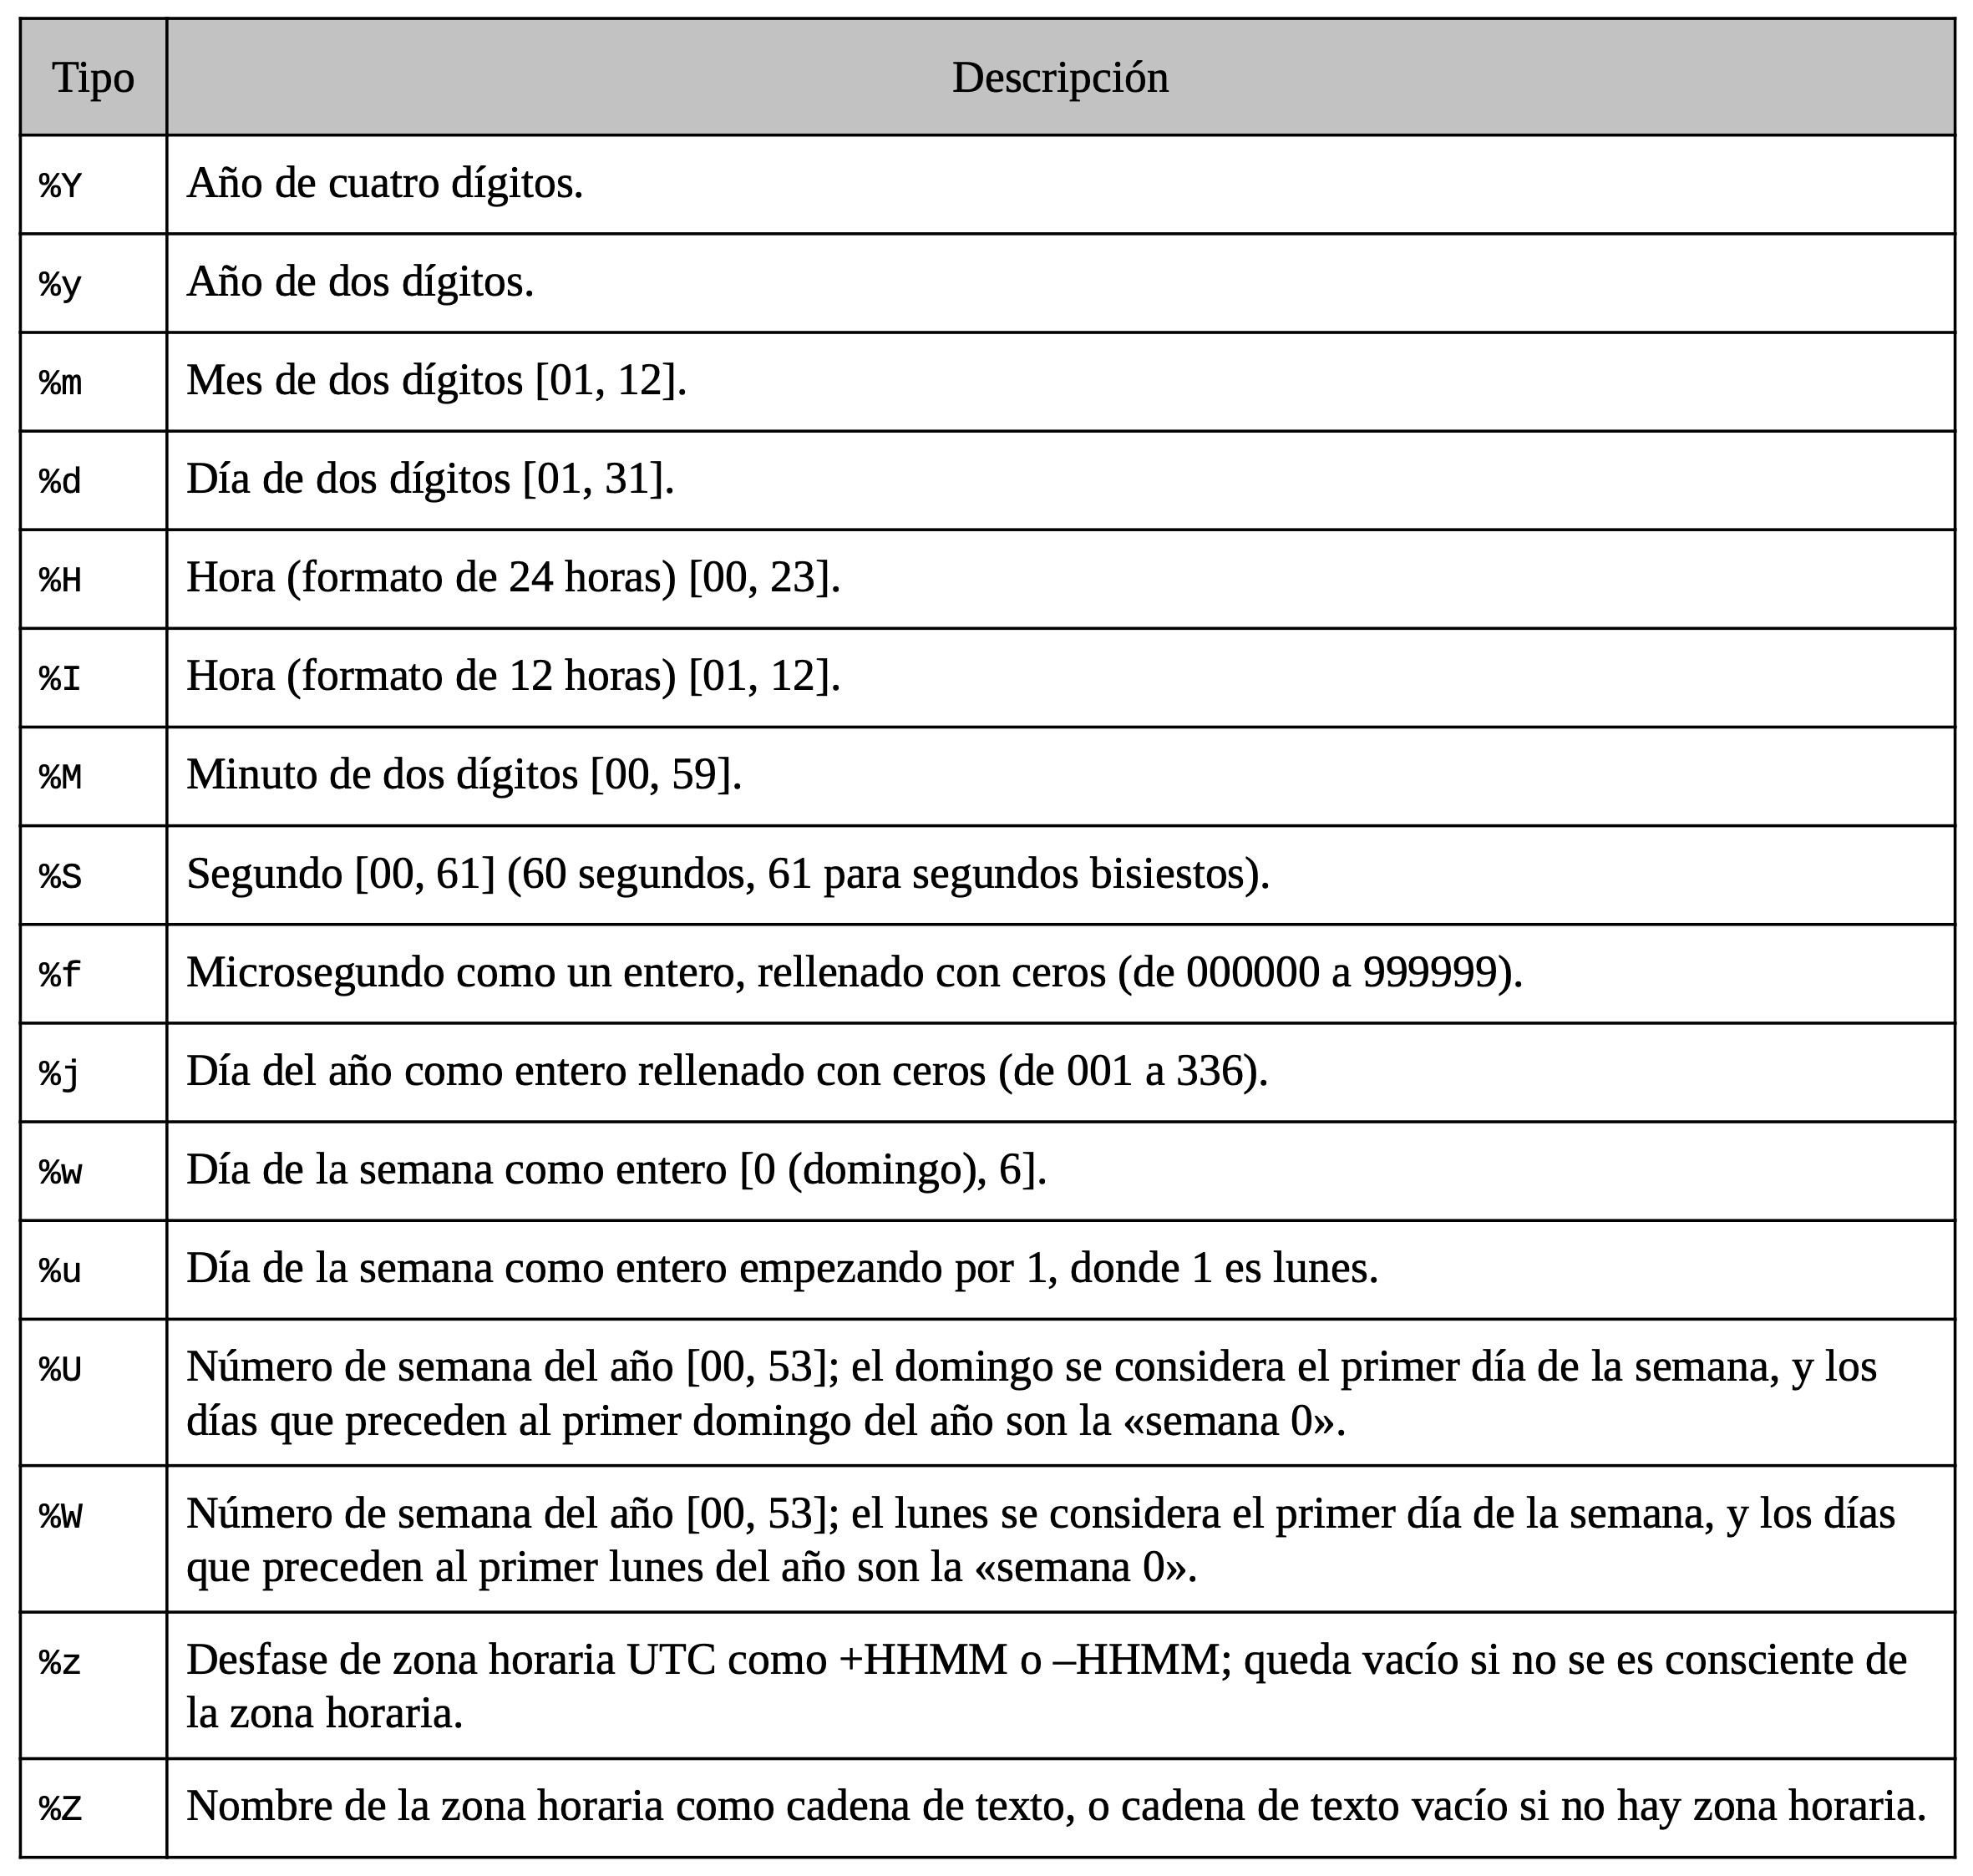

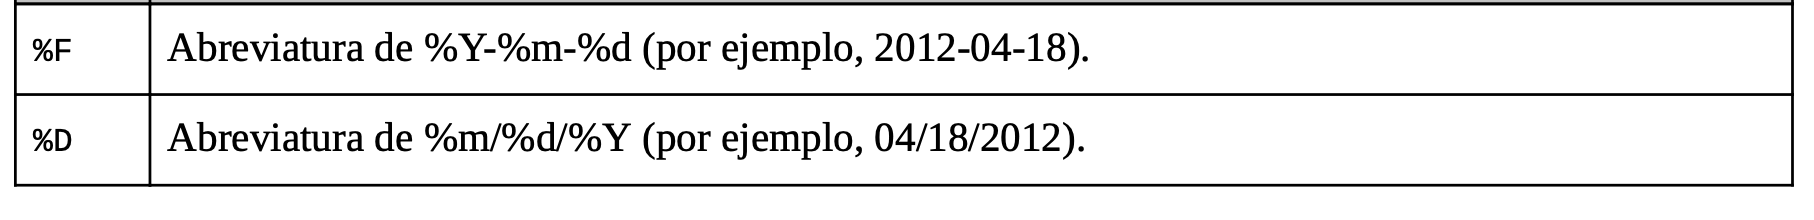

Se pueden utilizar muchos de los mismos códigos de formato para convertir cadenas de texto en fechas utilizando **datetime.strptime**

In [9]:
valor = '2011-01-03'

In [10]:
datetime.strptime(valor, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [11]:
D = datetime.strptime(valor, '%Y-%m-%d')

In [14]:
D.day

3

In [15]:
datos = ['7/6/2011', '8/6/2011']

In [16]:
[datetime.strptime(x, '%m/%d/%Y') for x in datos]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

*pandas* está normalmente orientado al trabajo con arrays de fechas, ya se utilicen como el índice de un eje o como una columna de un dataframe. El método **pandas.to_datetime** analiza muchos tipos distintos de representaciones de fecha. 

In [17]:
datos = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [18]:
pd.to_datetime(datos)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

Tambien gestiona valores que se deberían considerar ausentes (None, cadena de texto vacía, etc.):

In [20]:
idx = pd.to_datetime(datos + [None])

In [21]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [22]:
pd.isna(idx)

array([False, False,  True])

## Percepción de seguridad

Este indicador muestra el porcentaje de la población de 18 años y más que se siente insegura 

In [23]:
seg = pd.read_csv('percepcion_seguridad_2023.csv')

In [24]:
seg.index = pd.to_datetime(seg['fecha'])

/var/folders/sb/mtj687d163q5v96jqt3zjjd00000gn/T/ipykernel_1024/2626516707.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  seg.index = pd.to_datetime(seg['fecha'])


In [26]:
seg.head(10)

,fecha,nacional,ciudad_de_mexico
fecha,,,
2013-09-30,30/09/2013,29.224295,41.740833
2013-12-31,31/12/2013,31.425971,34.011041
2014-03-31,31/03/2014,27.944854,23.835146
2014-06-30,30/06/2014,30.262502,25.867241
2014-09-30,30/09/2014,31.268089,42.041802
2014-12-31,31/12/2014,32.342342,29.782581
2015-03-31,31/03/2015,31.916246,32.480863
2015-06-30,30/06/2015,31.216818,28.934395
2015-09-30,30/09/2015,31.371858,36.057851


In [27]:
seg = pd.read_csv('percepcion_seguridad_2023.csv')

In [28]:
Y = [datetime.strptime(x, '%d/%m/%Y') for x in seg['fecha']]

In [31]:
Y

[datetime.datetime(2013, 9, 30, 0, 0),
 datetime.datetime(2013, 12, 31, 0, 0),
 datetime.datetime(2014, 3, 31, 0, 0),
 datetime.datetime(2014, 6, 30, 0, 0),
 datetime.datetime(2014, 9, 30, 0, 0),
 datetime.datetime(2014, 12, 31, 0, 0),
 datetime.datetime(2015, 3, 31, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 9, 30, 0, 0),
 datetime.datetime(2015, 12, 31, 0, 0),
 datetime.datetime(2016, 3, 31, 0, 0),
 datetime.datetime(2016, 6, 30, 0, 0),
 datetime.datetime(2016, 9, 30, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2017, 3, 31, 0, 0),
 datetime.datetime(2017, 6, 30, 0, 0),
 datetime.datetime(2017, 9, 30, 0, 0),
 datetime.datetime(2017, 12, 31, 0, 0),
 datetime.datetime(2018, 3, 31, 0, 0),
 datetime.datetime(2018, 6, 30, 0, 0),
 datetime.datetime(2018, 9, 30, 0, 0),
 datetime.datetime(2018, 12, 31, 0, 0),
 datetime.datetime(2019, 3, 31, 0, 0),
 datetime.datetime(2019, 6, 30, 0, 0),
 datetime.datetime(2019, 9, 30, 0, 0),
 datetime.datetime(

In [32]:
A=[]
for i in range(0,41): A.append(Y[i].year)

In [33]:
seg['Anio'] = pd.DataFrame(A)

In [34]:
seg.head()

,fecha,nacional,ciudad_de_mexico,Anio
0,30/09/2013,29.224295,41.740833,2013
1,31/12/2013,31.425971,34.011041,2013
2,31/03/2014,27.944854,23.835146,2014
3,30/06/2014,30.262502,25.867241,2014
4,30/09/2014,31.268089,42.041802,2014


In [35]:
seg = seg.drop('fecha',axis=1)

In [36]:
p_seg = seg.groupby('Anio').mean()

In [37]:
p_seg 

,nacional,ciudad_de_mexico
Anio,,
2013,30.325133,37.875937
2014,30.454446,30.381692
2015,31.664775,32.102672
2016,31.989677,13.960777
2017,28.254208,10.663729
2018,27.163022,12.530364
2019,28.282020,18.888107
2020,30.775129,25.367803
2021,34.383414,31.480929


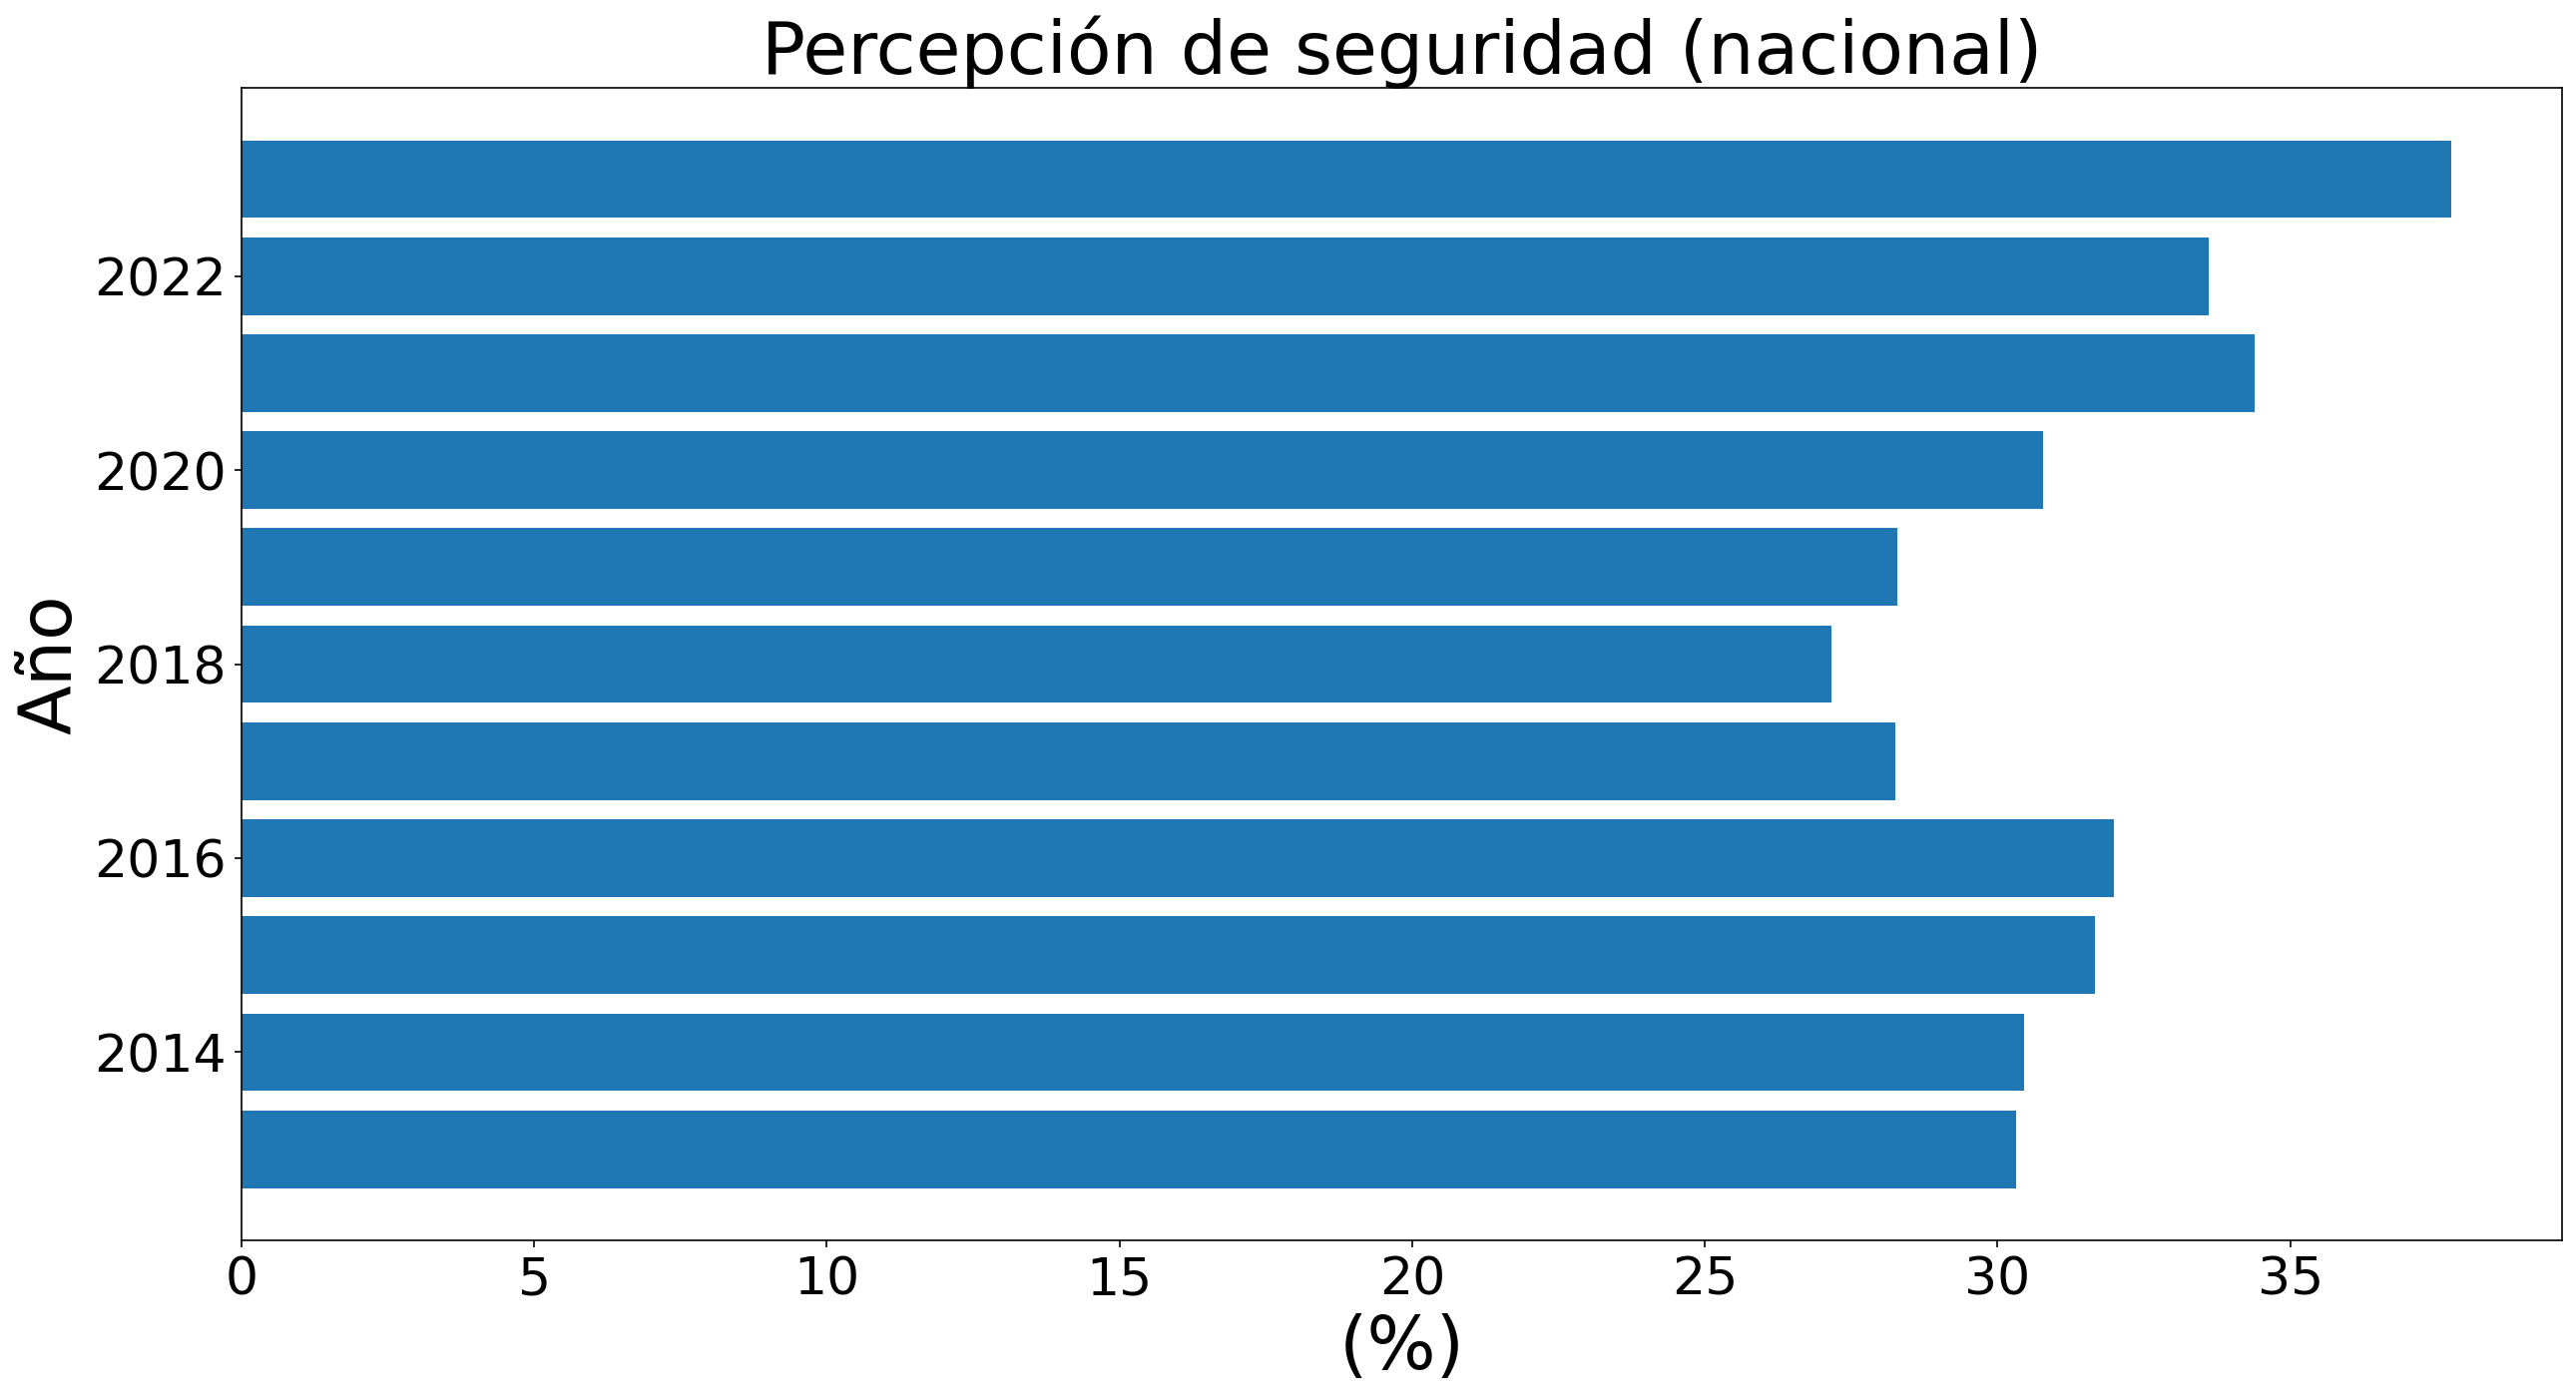

In [38]:
plt.figure(figsize=(20,10), dpi=150)
plt.barh(p_seg.index,p_seg['nacional'])
plt.xlabel('(%)', fontdict = {'fontsize':35 })
plt.ylabel('Año',fontdict = {'fontsize':35 })
plt.title('Percepción de seguridad (nacional)', fontsize = 35)
plt.tick_params(labelsize=25)

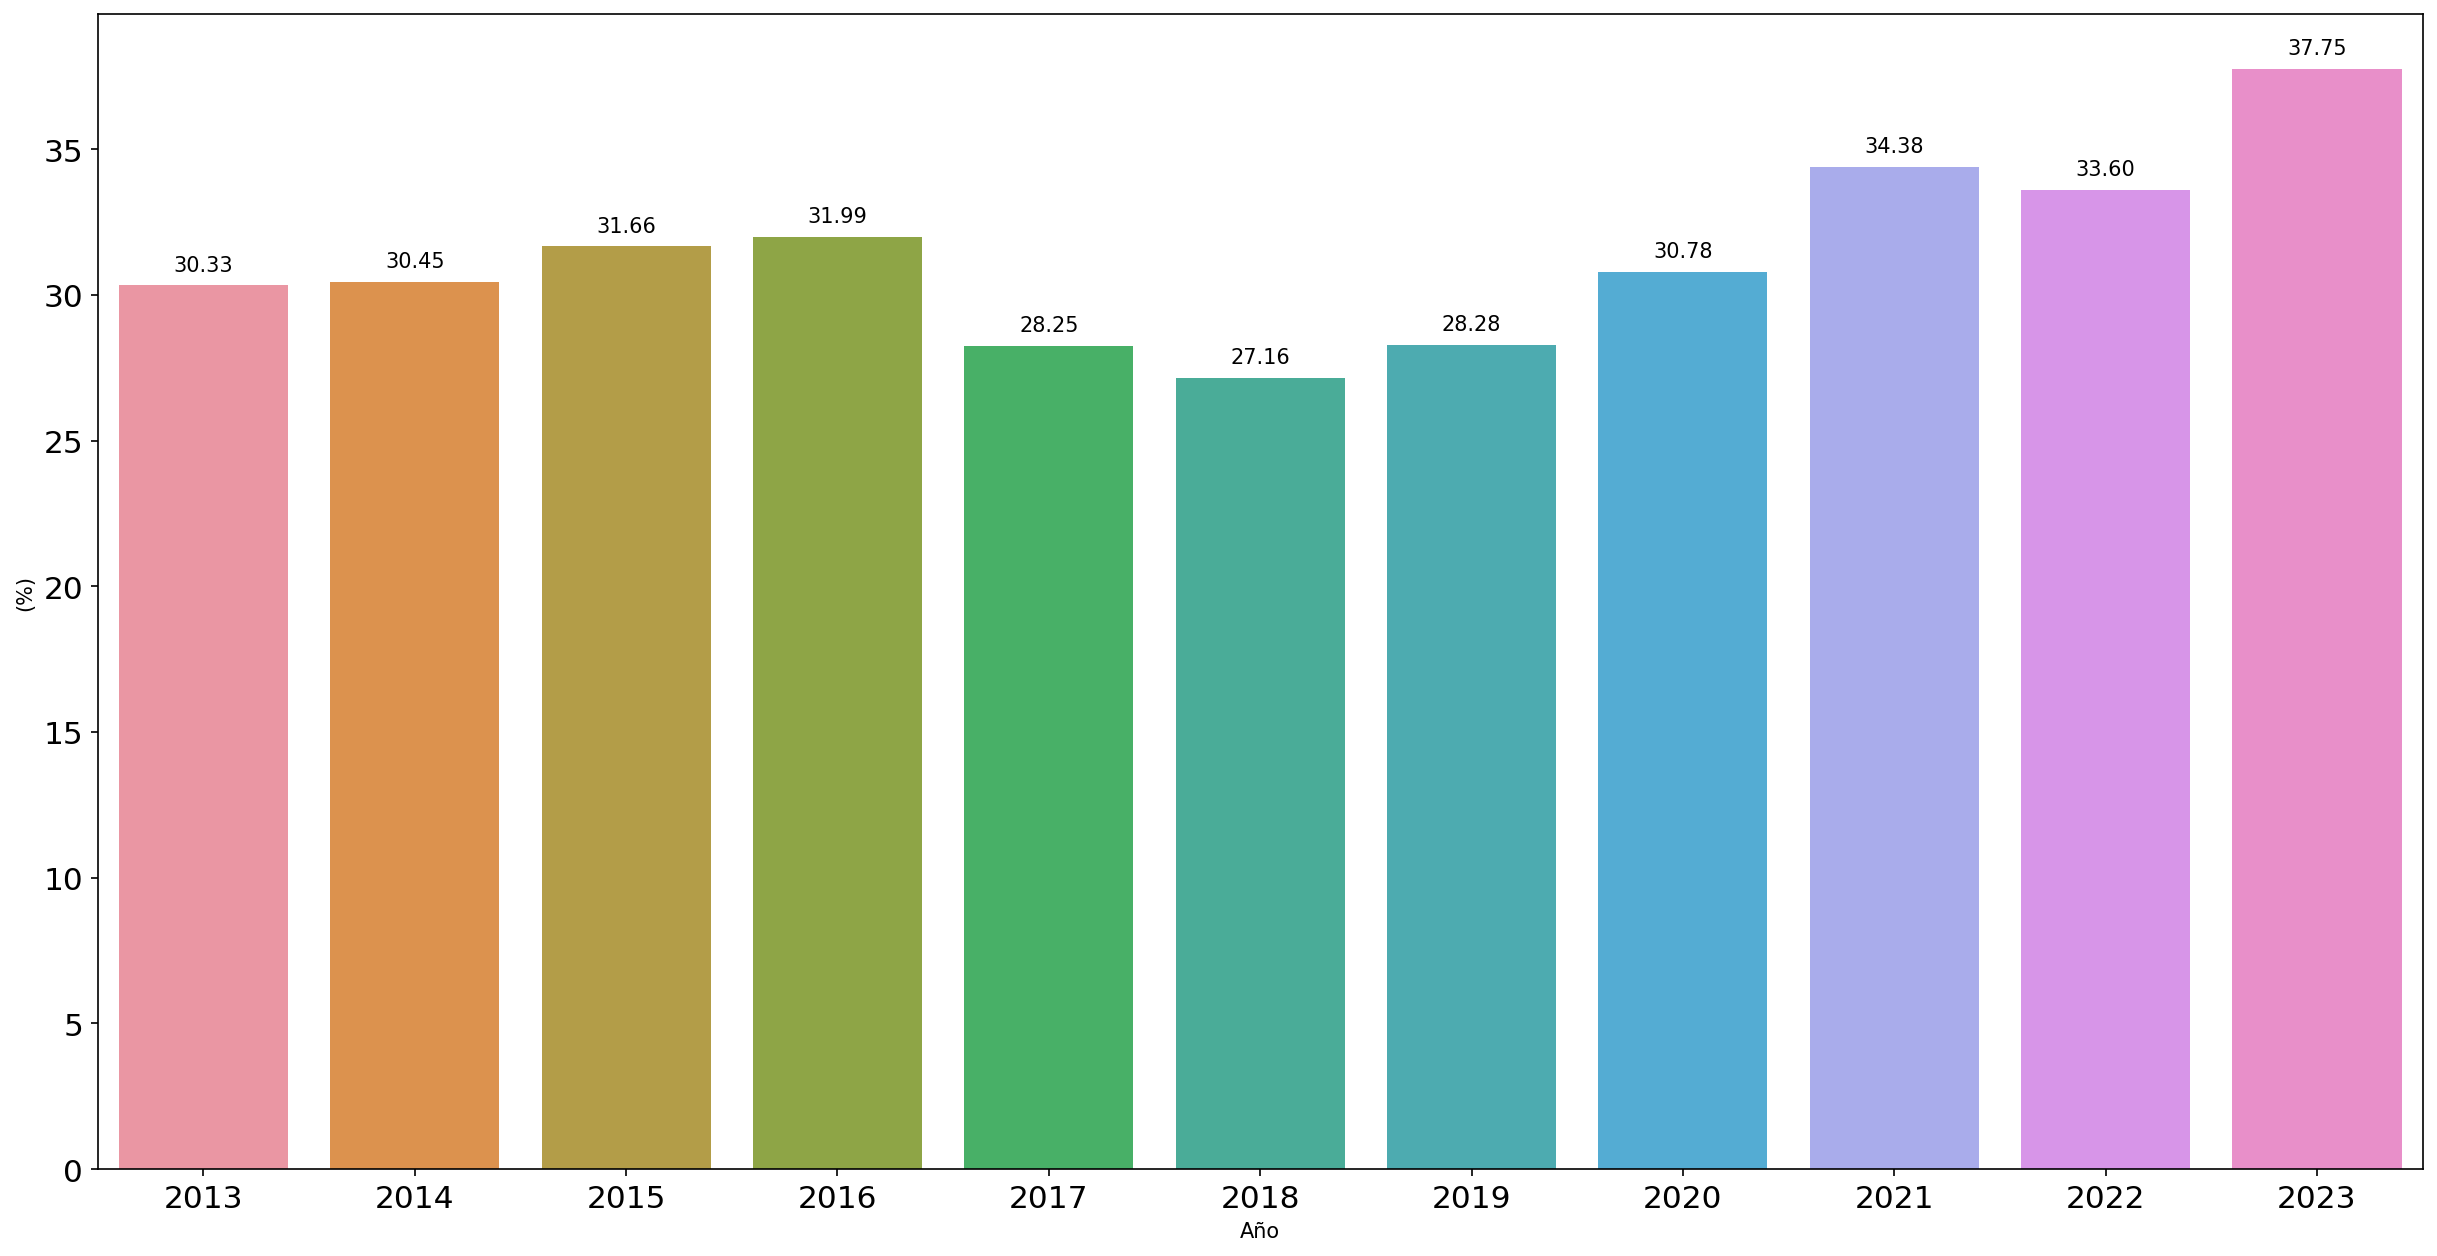

In [39]:
plt.figure(figsize=(20,10), dpi=150)
ax = sns.barplot(data=p_seg, x=p_seg.index , y='nacional')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

plt.xlabel('Año', fontdict = {'fontsize':10 })
plt.ylabel('(%)',fontdict = {'fontsize':10 })
plt.tick_params(labelsize=15)
plt.show()

Los objetos datetime tienen también una serie de opciones de formato de
configuración regional para sistemas de otros países o idiomas. Por ejemplo, los nombres de meses abreviados serán diferentes en los sistemas alemán o francés comparados con los sistemas anglosajones. 

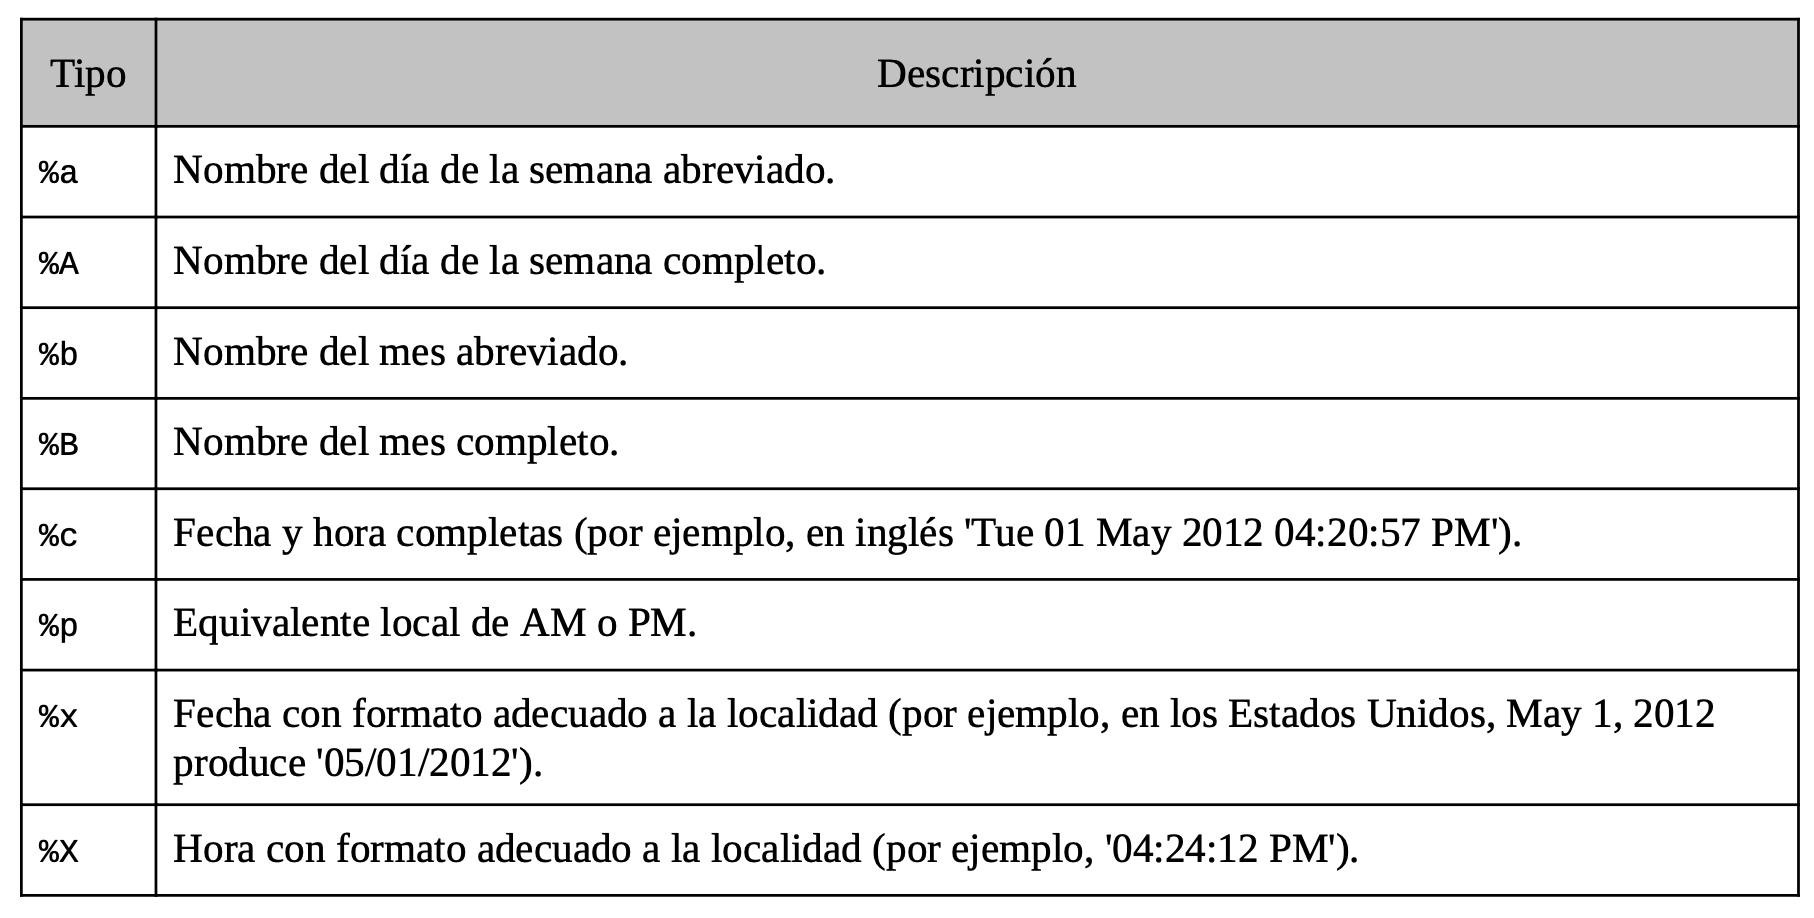

En pandas las marcas temporales se almacenan utilizando el tipo de datos datetime64 de NumPy a la resolución de nanosegundo:

In [40]:
seg.index.dtype

dtype('int64')

Los valores escalares de un DatetimeIndex son objetos Timestamp de pandas:

In [41]:
stamp = seg.index[0]

In [42]:
stamp

0

Para series temporales más largas, se puede pasar un año o solo un año y un mes para seleccionar fácilmente segmentos de datos

In [43]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range('2000-01-01',
                                          periods=1000))

In [44]:
longer_ts

2000-01-01   -1.031889
2000-01-02    0.362043
2000-01-03   -0.242237
2000-01-04   -0.806607
2000-01-05   -1.976515
                ...   
2002-09-22   -1.555386
2002-09-23   -0.737015
2002-09-24    0.166476
2002-09-25   -0.214212
2002-09-26    0.647362
Freq: D, Length: 1000, dtype: float64

In [45]:
longer_ts['2001']

2001-01-01    0.461899
2001-01-02    0.422472
2001-01-03    0.046622
2001-01-04    0.674826
2001-01-05    1.787101
                ...   
2001-12-27    0.445436
2001-12-28   -1.034702
2001-12-29   -0.126834
2001-12-30   -1.065927
2001-12-31    0.112879
Freq: D, Length: 365, dtype: float64

In [46]:
longer_ts['2001-05']

2001-05-01   -0.423274
2001-05-02    0.427447
2001-05-03    0.139761
2001-05-04    1.909253
2001-05-05   -0.343786
2001-05-06   -2.963687
2001-05-07   -0.006480
2001-05-08   -0.894495
2001-05-09   -0.229646
2001-05-10   -0.626353
2001-05-11    0.824747
2001-05-12    0.601445
2001-05-13    3.308384
2001-05-14    1.010657
2001-05-15   -1.147272
2001-05-16   -1.661432
2001-05-17    0.656967
2001-05-18    1.245380
2001-05-19    1.045673
2001-05-20   -0.243282
2001-05-21    1.423925
2001-05-22   -2.251228
2001-05-23    0.840175
2001-05-24   -0.912932
2001-05-25    1.341915
2001-05-26   -0.451937
2001-05-27   -2.073195
2001-05-28    1.389333
2001-05-29    0.603815
2001-05-30   -1.362327
2001-05-31    1.236448
Freq: D, dtype: float64

Segmentar con objetos datetime también funciona:

In [47]:
seg = pd.read_csv('percepcion_seguridad_2023.csv',usecols=['nacional'])

In [48]:
seg.index = pd.to_datetime(Y)

In [49]:
seg[datetime(2015, 1, 1):datetime(2017, 12, 30)]

,nacional
2015-03-31,31.916246
2015-06-30,31.216818
2015-09-30,31.371858
2015-12-31,32.154177
2016-03-31,33.160764
2016-06-30,34.048819
2016-09-30,31.300560
2016-12-31,29.448565
2017-03-31,30.592993
2017-06-30,27.739323


Como la mayoría de los datos de series temporales está ordenada cronológicamente, se puede segmentar con marcas temporales no contenidas en una serie temporal para realizar la consulta de un rango:

In [50]:
seg['2016-01-01':'2017-12-01']

,nacional
2016-03-31,33.160764
2016-06-30,34.048819
2016-09-30,31.300560
2016-12-31,29.448565
2017-03-31,30.592993
2017-06-30,27.739323
2017-09-30,27.303901


Hay un método de instancia equivalente, *truncate*

In [52]:
seg.truncate(after = '2018-01-01')

,nacional
2013-09-30,29.224295
2013-12-31,31.425971
2014-03-31,27.944854
2014-06-30,30.262502
2014-09-30,31.268089
2014-12-31,32.342342
2015-03-31,31.916246
2015-06-30,31.216818
2015-09-30,31.371858
2015-12-31,32.154177


In [54]:
fechas = pd.date_range('2023-01-01', periods=100, freq='D')

In [55]:
fechas

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
      

In [56]:
long_df = pd.DataFrame(np.random.standard_normal((100, 3)),
                       index=fechas,
                       columns=['Iztapalapa','Cuajimalpa','Xochimilco'])
                       

In [58]:
long_df.loc['2023-04']

,Iztapalapa,Cuajimalpa,Xochimilco
2023-04-01,-1.891191,-0.396395,-0.404442
2023-04-02,1.762824,0.689514,-0.625745
2023-04-03,0.826230,0.649355,2.376049
2023-04-04,0.468409,-0.102396,-1.026729
2023-04-05,0.725407,0.504239,0.054564
2023-04-06,1.427883,0.520137,-0.716934
2023-04-07,1.195020,0.430594,0.703549
2023-04-08,-0.260467,-0.611347,1.632050
2023-04-09,0.403404,1.439654,-1.021780
2023-04-10,0.449144,-0.250228,-1.034958


## Índices duplicados

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/consumo_agua_historico_2019.csv',
                 usecols=['fecha_referencia','consumo_prom'],
                 index_col=0, parse_dates=True)

In [60]:
df

,consumo_prom
fecha_referencia,
2019-06-30,42.066667
2019-06-30,28.782500
2019-06-30,32.993333
2019-06-30,84.510000
2019-06-30,76.304545
...,...
2019-02-28,19.307568
2019-02-28,20.976702
2019-02-28,29.344381


Podemos decir que el índice no es único comprobando su propiedad is_unique:

In [61]:
df.index.is_unique

False

Supongamos que queremos un valor de todos los datos que tienen marcas temporales no únicas. Una forma de hacerlo es utilizando groupby y pasando level=0 (el único nivel existente):

In [62]:
grouped = df.groupby(level=0)

In [63]:
grouped.mean()

,consumo_prom
fecha_referencia,
2019-02-28,106.662442
2019-04-30,114.022821
2019-06-30,112.860258


In [64]:
grouped.count()

,consumo_prom
fecha_referencia,
2019-02-28,23338
2019-04-30,23942
2019-06-30,23822


In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/defunciones_CDMX.csv',
                 usecols=['fec_defuncion','edad'],
                 index_col=1, parse_dates=True)

/var/folders/sb/mtj687d163q5v96jqt3zjjd00000gn/T/ipykernel_1024/2749596314.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/defunciones_CDMX.csv',


In [66]:
df

,edad
fec_defuncion,
2019-12-31,73.0
2019-12-31,88.0
2019-12-31,55.0
2019-12-31,81.0
2019-12-31,87.0
...,...
2019-10-08,108.0
2019-10-08,55.0
2019-10-08,75.0


In [67]:
grouped = df.groupby(level=0)

In [68]:
ed_prom = grouped.mean()
ed_prom

,edad
fec_defuncion,
2019-01-09,61.100000
2019-01-10,67.684211
2019-01-11,64.139423
2019-01-12,64.707207
2019-02-09,62.473118
...,...
2019-12-27,64.452756
2019-12-28,65.493333
2019-12-29,64.358779


In [69]:
resampler = ed_prom.resample('D')

In [70]:
E = resampler.first()
E

,edad
fec_defuncion,
2019-01-09,61.100000
2019-01-10,67.684211
2019-01-11,64.139423
2019-01-12,64.707207
2019-01-13,NaN
...,...
2019-12-27,64.452756
2019-12-28,65.493333
2019-12-29,64.358779


In [71]:
E=E.fillna(E['edad'].median())

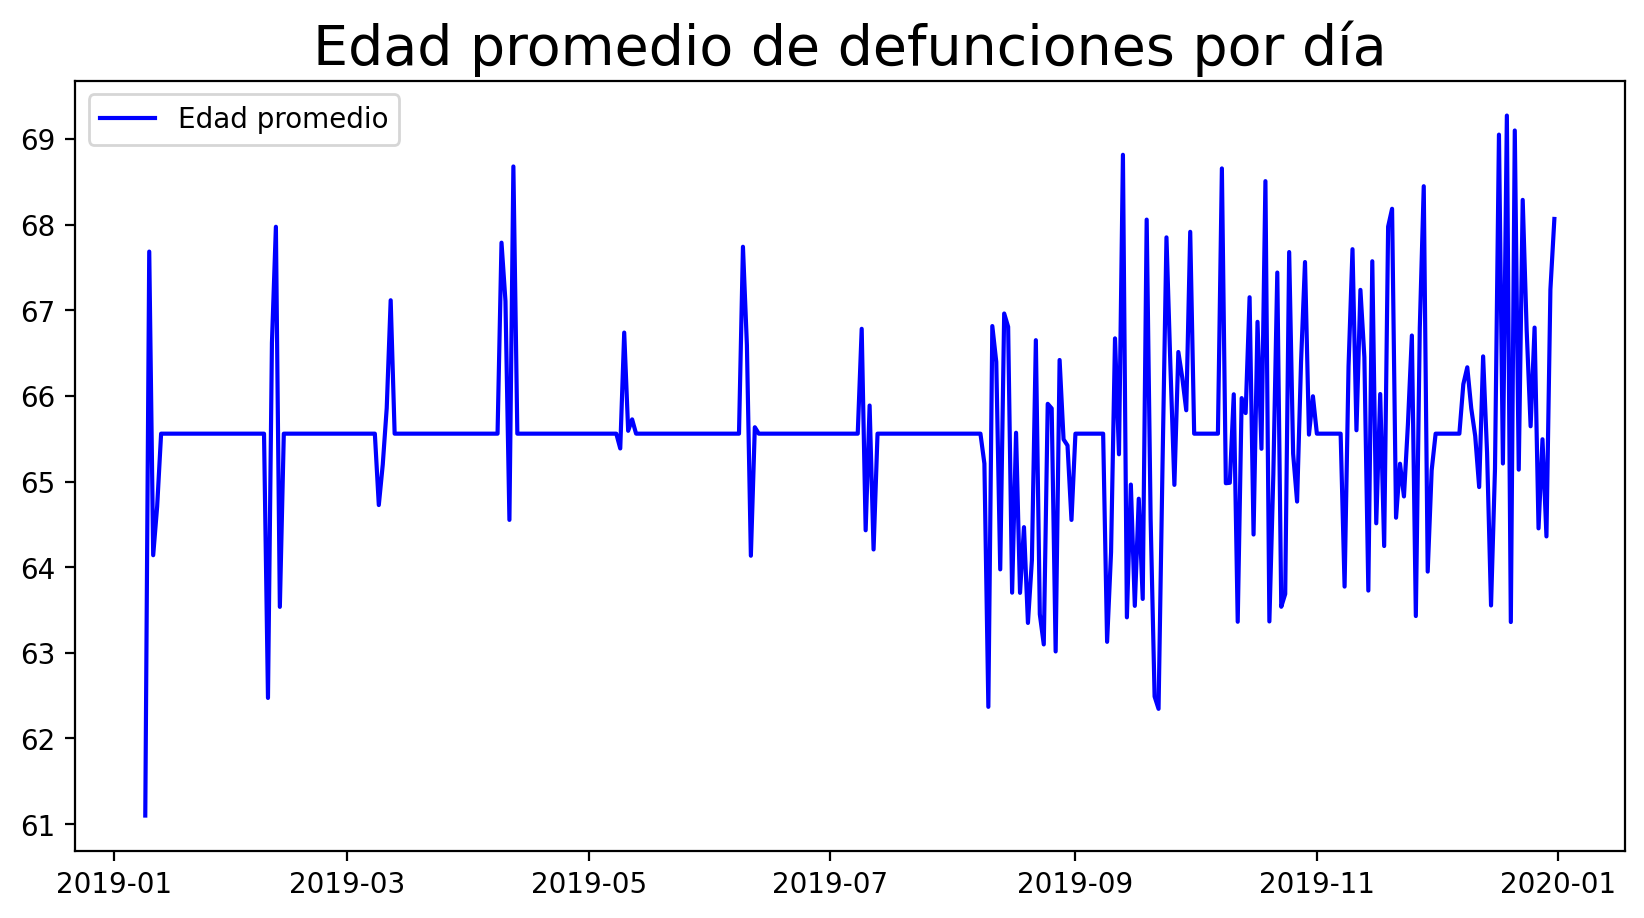

In [72]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
ax.plot(E['edad'], color='blue', label='Edad promedio');

ax.set_title('Edad promedio de defunciones por día', fontdict = {'fontsize':20 })
ax.tick_params(labelsize=10)
ax.legend()

## Generación de rangos de fechas 

**pandas.date_range** es responsable de generar un DatetimeIndex con una longitud indicada según una determinada frecuencia:

In [74]:
index = pd.date_range('2024-04-01', '2024-06-01')

In [75]:
index

DatetimeIndex(['2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04',
               '2024-04-05', '2024-04-06', '2024-04-07', '2024-04-08',
               '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
               '2024-04-13', '2024-04-14', '2024-04-15', '2024-04-16',
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20',
               '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24',
               '2024-04-25', '2024-04-26', '2024-04-27', '2024-04-28',
               '2024-04-29', '2024-04-30', '2024-05-01', '2024-05-02',
               '2024-05-03', '2024-05-04', '2024-05-05', '2024-05-06',
               '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10',
               '2024-05-11', '2024-05-12', '2024-05-13', '2024-05-14',
               '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-18',
               '2024-05-19', '2024-05-20', '2024-05-21', '2024-05-22',
               '2024-05-23', '2024-05-24', '2024-05-25', '2024-05-26',
      

De forma predeterminada, pandas.date_range genera marcas temporales diarias. Si se pasa solamente una fecha de inicio o de fin, se deben pasar el número de periodos que se deseen generar:

In [76]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [77]:
pd.date_range(end='2012-04-01', periods=20)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-17', '2012-03-18', '2012-03-19', '2012-03-20',
               '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-24',
               '2012-03-25', '2012-03-26', '2012-03-27', '2012-03-28',
               '2012-03-29', '2012-03-30', '2012-03-31', '2012-04-01'],
              dtype='datetime64[ns]', freq='D')

Las fechas de inicio y fin definen estrictos límites para el índice de fecha generado. Por ejemplo, si quisiéramos un índice de fecha que contuviera el último día laborable de cada mes, pasaríamos la frecuencia “BM” (fin de mes
laborable), y solo se incluirían las fechas que entraran dentro de ese intervalo de fechas:

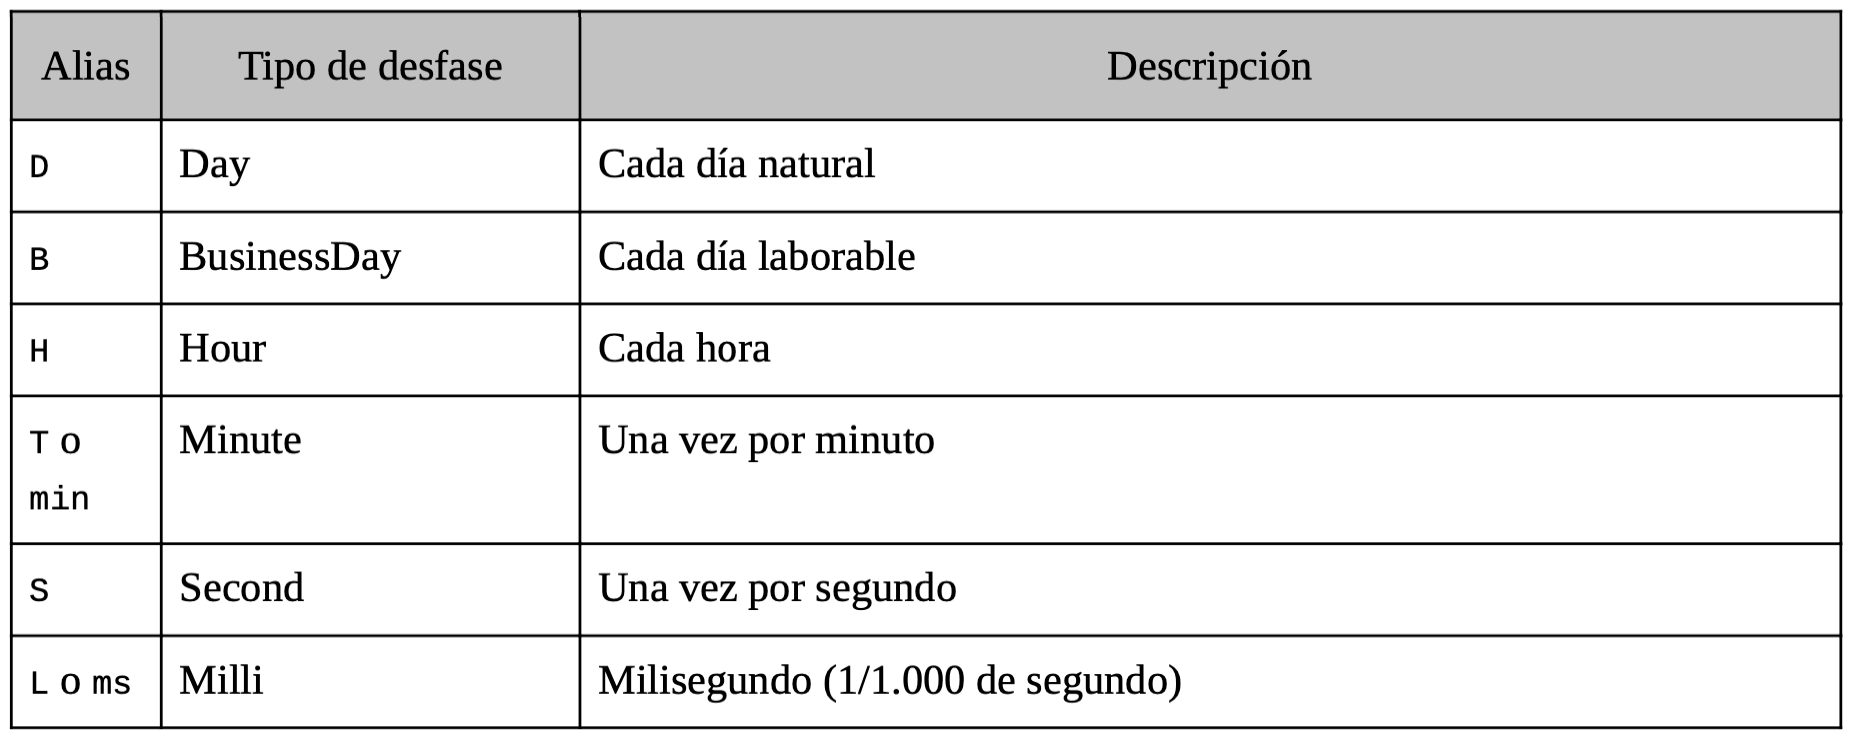

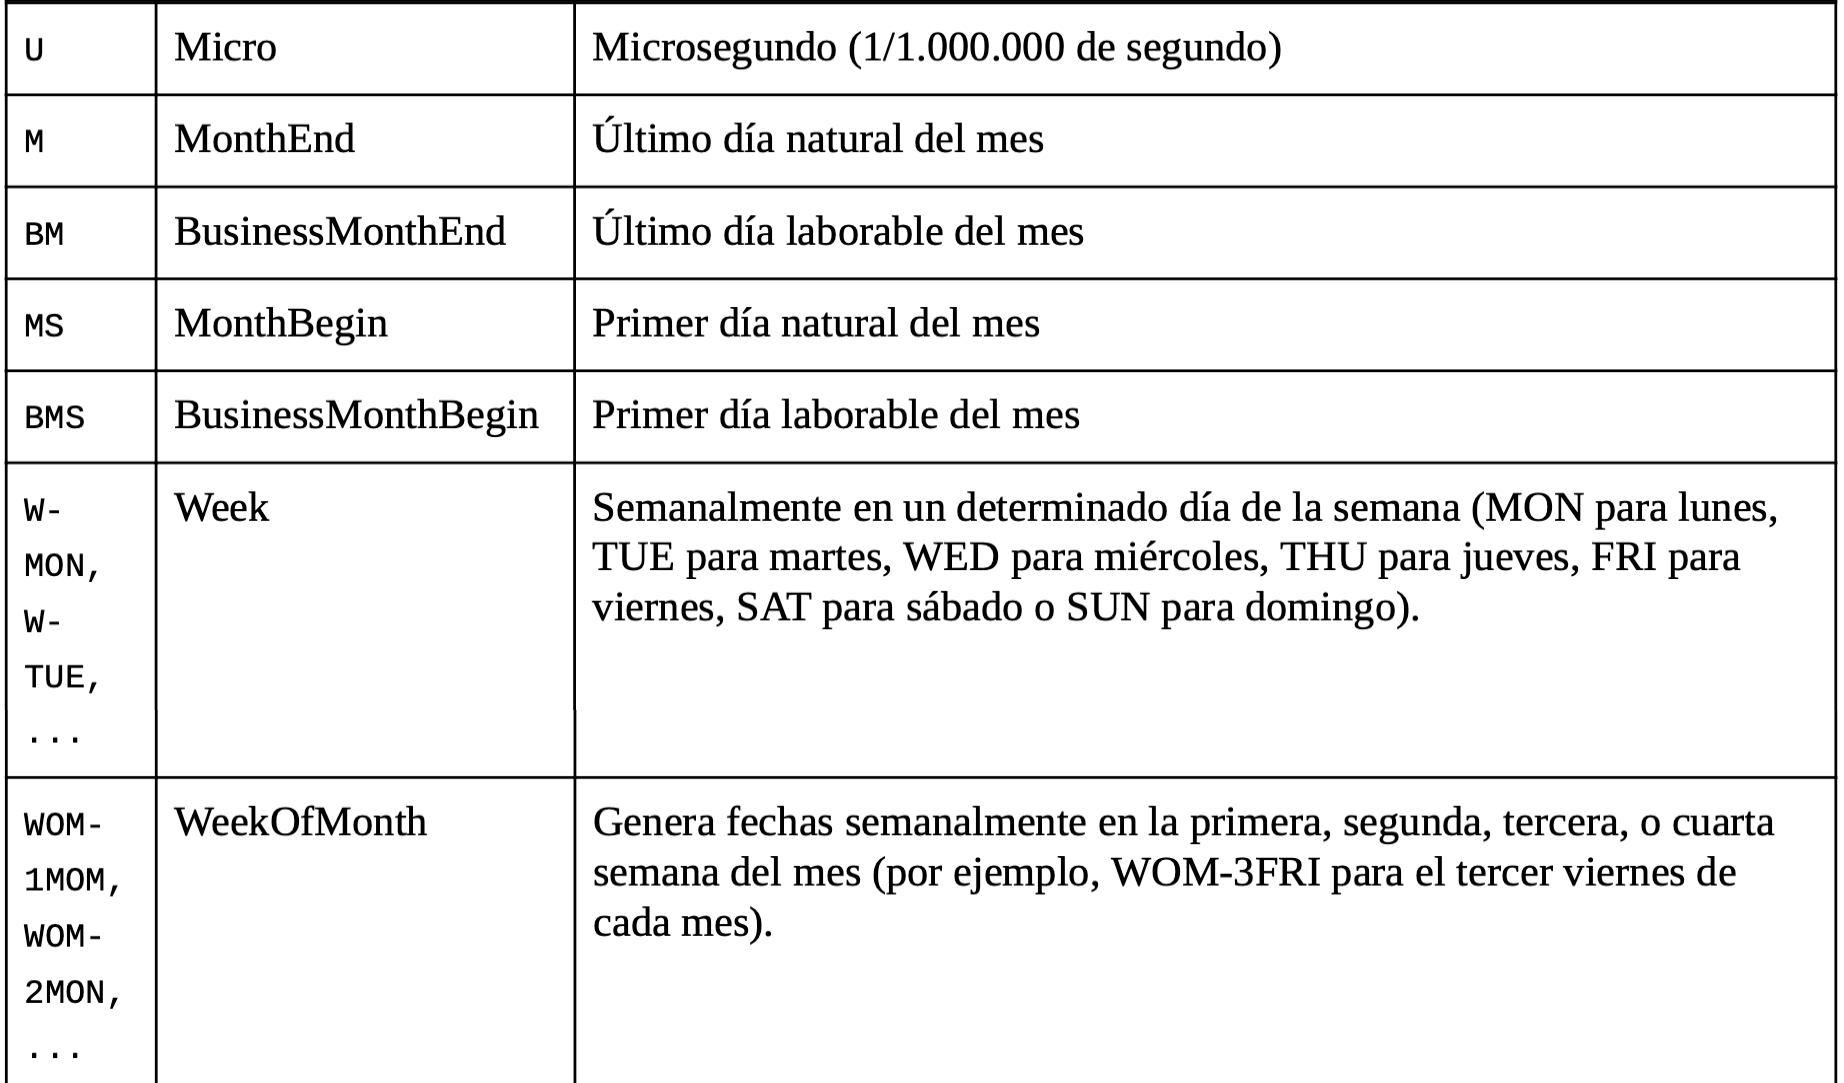

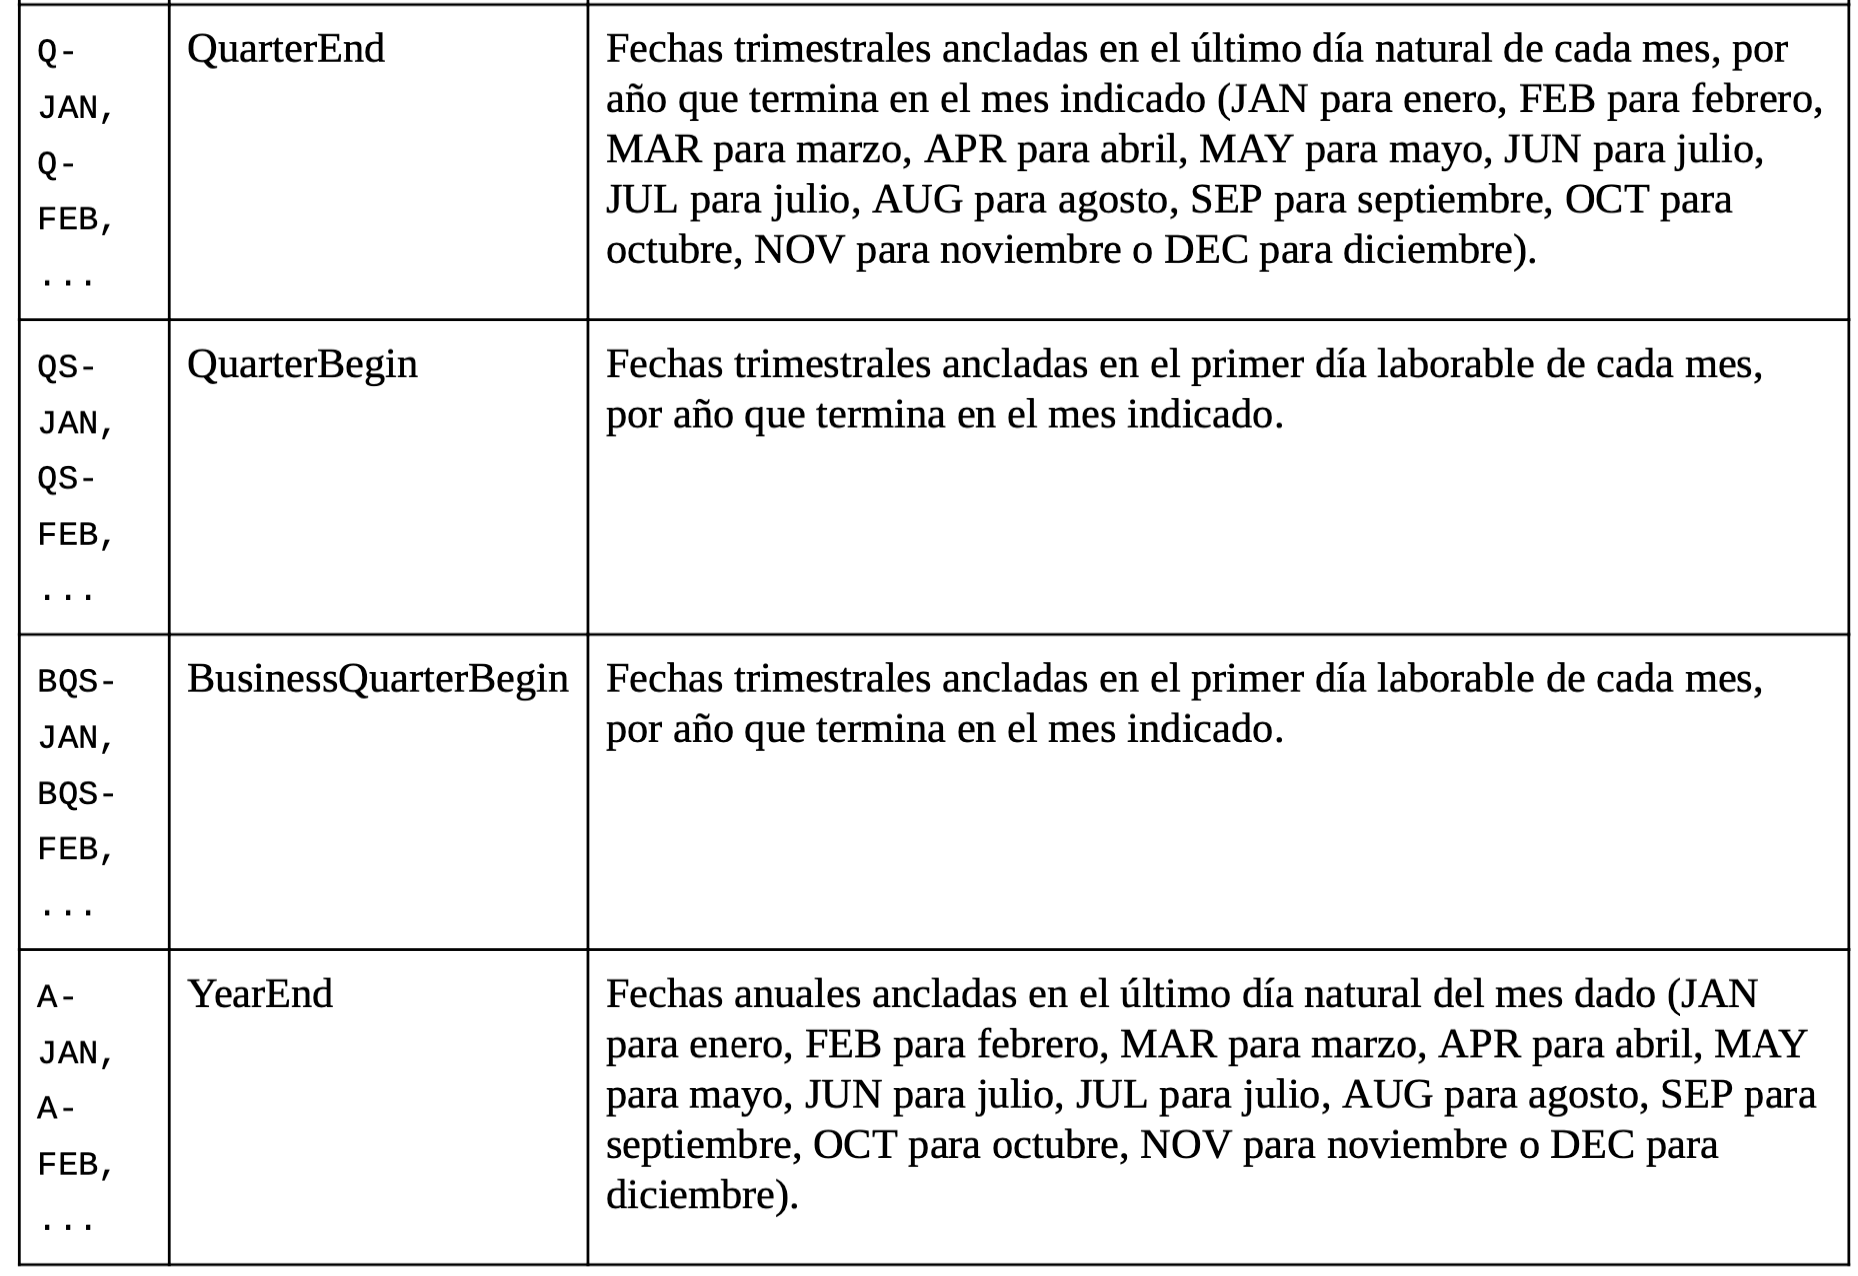

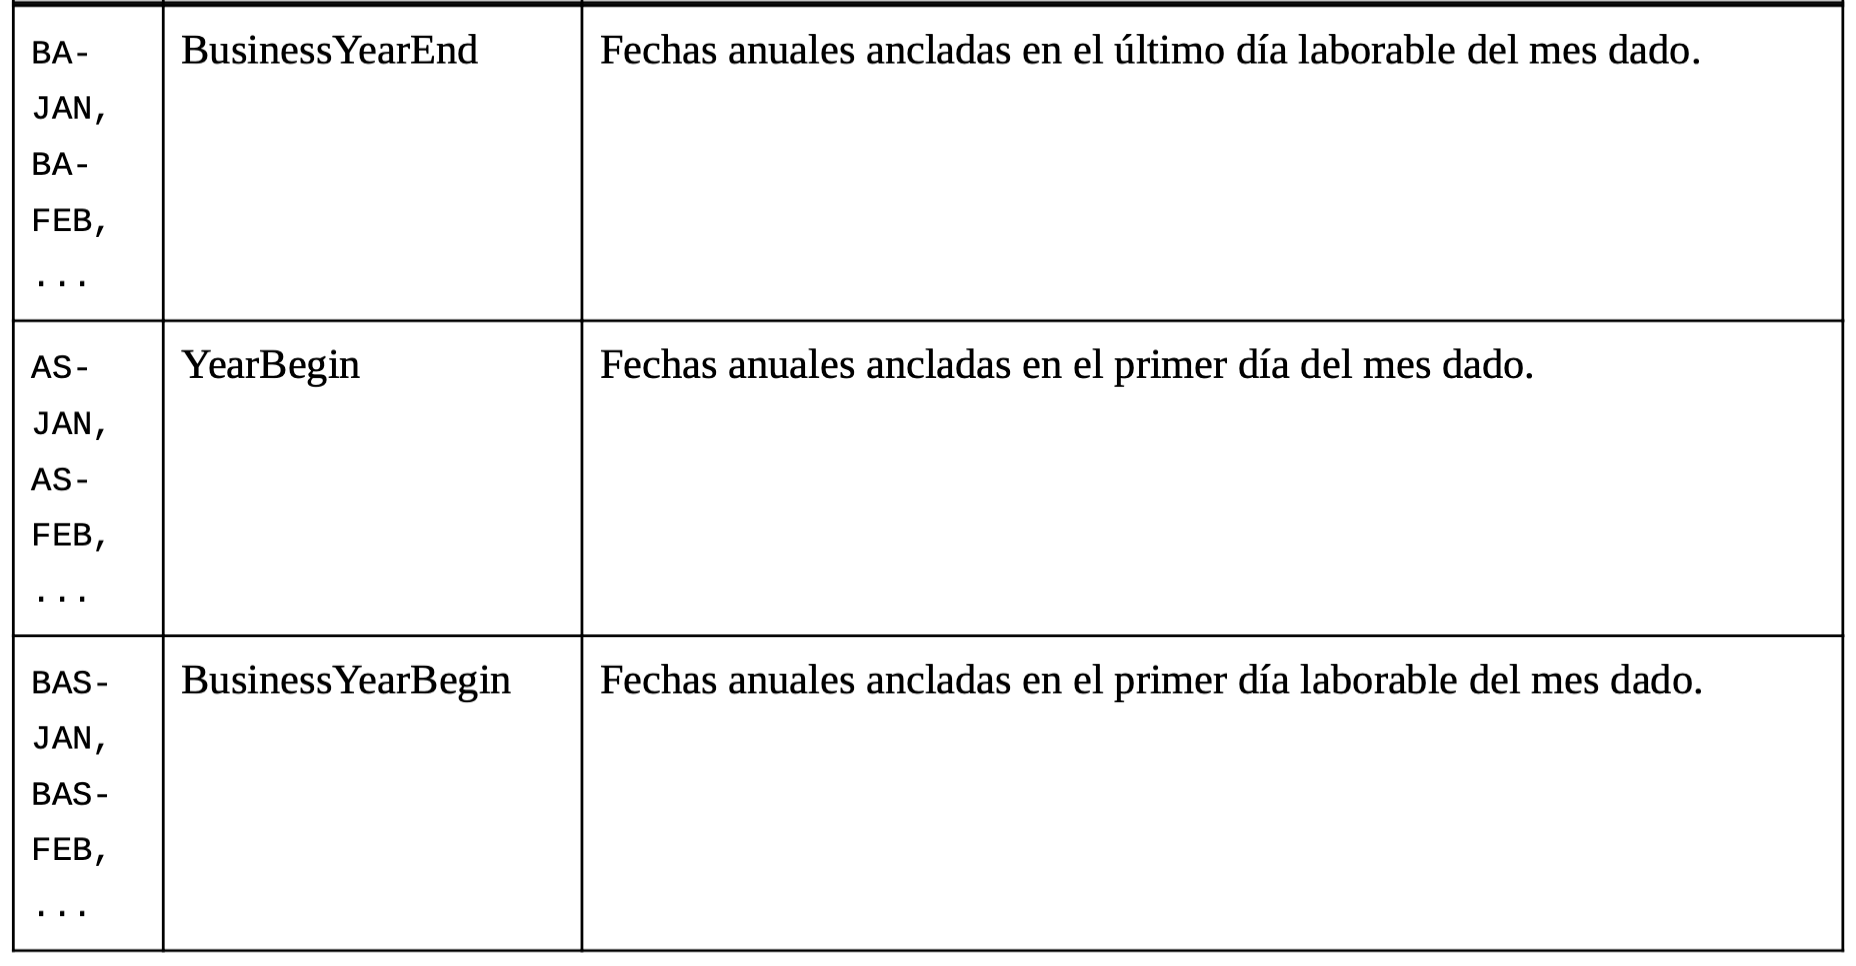

**pandas.date_range** conserva por defecto la hora (si la hay) del inicio o fin de la marca temporal:

In [78]:
pd.date_range('2012-05-02 12:56:31', periods = 5, freq='H')

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-02 13:56:31',
               '2012-05-02 14:56:31', '2012-05-02 15:56:31',
               '2012-05-02 16:56:31'],
              dtype='datetime64[ns]', freq='H')

## Frecuencias y desfases de fechas

Para cada frecuencia base tenemos un objeto al que denominamos desfase de fecha. 

In [79]:
pd.date_range('2024-01-01', '2024-01-03 23:59', freq='4H')

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 04:00:00',
               '2024-01-01 08:00:00', '2024-01-01 12:00:00',
               '2024-01-01 16:00:00', '2024-01-01 20:00:00',
               '2024-01-02 00:00:00', '2024-01-02 04:00:00',
               '2024-01-02 08:00:00', '2024-01-02 12:00:00',
               '2024-01-02 16:00:00', '2024-01-02 20:00:00',
               '2024-01-03 00:00:00', '2024-01-03 04:00:00',
               '2024-01-03 08:00:00', '2024-01-03 12:00:00',
               '2024-01-03 16:00:00', '2024-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [80]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Algunas frecuencias describen puntos en el tiempo que no por igual. Por ejemplo, “M” (fin de mes natural) y “BM” (último mes) dependen del número de días del mes y, en el último caso, de si el mes termina en fin de semana o no. Estas frecuencias se denominan desfases anclados.

Una clase de frecuencia útil es «semana del mes», que empieza por WOM (Week Of Month: semana del mes). Permite obtener fechas como, por ejemplo,
el tercer viernes de cada mes:

In [81]:
monthly_dates = pd.date_range('2024-01-01', '2024-09-01', 
                              freq='WOM-3FRI')


In [82]:
monthly_dates

DatetimeIndex(['2024-01-19', '2024-02-16', '2024-03-15', '2024-04-19',
               '2024-05-17', '2024-06-21', '2024-07-19', '2024-08-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [96]:
list(monthly_dates)

[Timestamp('2024-01-19 00:00:00'),
 Timestamp('2024-02-16 00:00:00'),
 Timestamp('2024-03-15 00:00:00'),
 Timestamp('2024-04-19 00:00:00'),
 Timestamp('2024-05-17 00:00:00'),
 Timestamp('2024-06-21 00:00:00'),
 Timestamp('2024-07-19 00:00:00'),
 Timestamp('2024-08-16 00:00:00')]